In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
import pandasql as psql

In [2]:
fraud = pd.read_csv(r"C:\Users\yuvas\OneDrive\Desktop\intern\fraud_insurance_claims.csv", header=0)
fraud_BK = fraud.copy()
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014 00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015 00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006 00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015 00:00,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000 00:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015 00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990 00:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015 00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014 00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015 00:00,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
fraud['fraud_reported'] = fraud ['fraud_reported'].str.replace('Y', '0')
fraud['fraud_reported'] = fraud['fraud_reported'].str.replace('N', '1')
fraud['fraud_reported'] = fraud['fraud_reported'].astype(int)

In [5]:
fraud_reported_c = fraud.fraud_reported.value_counts()
print('Class 0:', fraud_reported_c[0])
print('Class 1:', fraud_reported_c[1])
print('Proportion:', round(fraud_reported_c[0] / fraud_reported_c[1], 2), ': 1')
print('Total Bank records:', len(fraud))

Class 0: 247
Class 1: 753
Proportion: 0.33 : 1
Total Bank records: 1000


In [6]:
fraud.duplicated().any()

False

In [7]:
fraud = fraud.drop(['policy_number', 'insured_zip', 'police_report_available','incident_location','auto_make','policy_state','incident_state','incident_city','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_hour_of_the_day','auto_model'], axis=1)

In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   capital-gains                1000 non-null   int64  
 8   capital-loss                 1000 non-null   int64  
 9   incident_date                1000 non-null   object 
 10  incident_type                1000 non-null   object 
 11  collision_type               1000 non-null   object 
 12  incident_severity            1000 non-null   object 
 13  authorities_contact

In [9]:
fraud.head()

,months_as_customer,age,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,17-10-2014 00:00,250/500,1000,1406.91,0,53300,0,25-01-2015 00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,1,YES,1,2,71610,6510,13020,52080,2004,0
1,228,42,27-06-2006 00:00,250/500,2000,1197.22,5000000,0,0,21-01-2015 00:00,Vehicle Theft,?,Minor Damage,Police,1,?,0,0,5070,780,780,3510,2007,0
2,134,29,06-09-2000 00:00,100/300,2000,1413.14,5000000,35100,0,22-02-2015 00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,3,NO,2,3,34650,7700,3850,23100,2007,1
3,256,41,25-05-1990 00:00,250/500,2000,1415.74,6000000,48900,-62400,10-01-2015 00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,1,?,1,2,63400,6340,6340,50720,2014,0
4,228,44,06-06-2014 00:00,500/1000,1000,1583.91,6000000,66000,-46000,17-02-2015 00:00,Vehicle Theft,?,Minor Damage,None,1,NO,0,1,6500,1300,650,4550,2009,1


In [10]:
# Refer 4 Auto Insurance Claims Data

# Replacing '?' value with nan values in total dataset
fraud.replace('?', np.nan, inplace = True)

In [11]:
fraud.head()

,months_as_customer,age,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,17-10-2014 00:00,250/500,1000,1406.91,0,53300,0,25-01-2015 00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,1,YES,1,2,71610,6510,13020,52080,2004,0
1,228,42,27-06-2006 00:00,250/500,2000,1197.22,5000000,0,0,21-01-2015 00:00,Vehicle Theft,NaN,Minor Damage,Police,1,NaN,0,0,5070,780,780,3510,2007,0
2,134,29,06-09-2000 00:00,100/300,2000,1413.14,5000000,35100,0,22-02-2015 00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,3,NO,2,3,34650,7700,3850,23100,2007,1
3,256,41,25-05-1990 00:00,250/500,2000,1415.74,6000000,48900,-62400,10-01-2015 00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,1,NaN,1,2,63400,6340,6340,50720,2014,0
4,228,44,06-06-2014 00:00,500/1000,1000,1583.91,6000000,66000,-46000,17-02-2015 00:00,Vehicle Theft,NaN,Minor Damage,None,1,NO,0,1,6500,1300,650,4550,2009,1


In [12]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   capital-gains                1000 non-null   int64  
 8   capital-loss                 1000 non-null   int64  
 9   incident_date                1000 non-null   object 
 10  incident_type                1000 non-null   object 
 11  collision_type               822 non-null    object 
 12  incident_severity            1000 non-null   object 
 13  authorities_contact

In [13]:
from sklearn.impute import SimpleImputer

imputer_si = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

fraud['collision_type'] = imputer_si.fit_transform(fraud[['collision_type']])
fraud['property_damage'] = imputer_si.fit_transform(fraud[['property_damage']])

fraud

,months_as_customer,age,policy_bind_date,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,17-10-2014 00:00,250/500,1000,1406.91,0,53300,0,25-01-2015 00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,1,YES,1,2,71610,6510,13020,52080,2004,0
1,228,42,27-06-2006 00:00,250/500,2000,1197.22,5000000,0,0,21-01-2015 00:00,Vehicle Theft,Rear Collision,Minor Damage,Police,1,NO,0,0,5070,780,780,3510,2007,0
2,134,29,06-09-2000 00:00,100/300,2000,1413.14,5000000,35100,0,22-02-2015 00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,3,NO,2,3,34650,7700,3850,23100,2007,1
3,256,41,25-05-1990 00:00,250/500,2000,1415.74,6000000,48900,-62400,10-01-2015 00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,1,NO,1,2,63400,6340,6340,50720,2014,0
4,228,44,06-06-2014 00:00,500/1000,1000,1583.91,6000000,66000,-46000,17-02-2015 00:00,Vehicle Theft,Rear Collision,Minor Damage,None,1,NO,0,1,6500,1300,650,4550,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991 00:00,500/1000,1000,1310.80,0,0,0,22-02-2015 00:00,Single Vehicle Collision,Front Collision,Minor Damage,Fire,1,YES,0,1,87200,17440,8720,61040,2006,1
996,285,41,05-01-2014 00:00,100/300,1000,1436.79,0,70900,0,24-01-2015 00:00,Single Vehicle Collision,Rear Collision,Major Damage,Fire,1,YES,2,3,108480,18080,18080,72320,2015,1
997,130,34,17-02-2003 00:00,250/500,500,1383.49,3000000,35100,0,23-01-2015 00:00,Multi-vehicle Collision,Side Collision,Minor Damage,Police,3,NO,2,3,67500,7500,7500,52500,1996,1
998,458,62,18-11-2011 00:00,500/1000,2000,1356.92,5000000,0,0,26-02-2015 00:00,Single Vehicle Collision,Rear Collision,Major Damage,Other,1,NO,0,1,46980,5220,5220,36540,1998,1


In [14]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

fraud['policy_bind_date'] = LE.fit_transform(fraud['policy_bind_date'])
fraud['policy_csl'] = LE.fit_transform(fraud['policy_csl'])
fraud['incident_date'] = LE.fit_transform(fraud['incident_date'])
fraud['incident_type'] =LE.fit_transform(fraud['incident_type'])
fraud['collision_type'] =LE.fit_transform(fraud['collision_type'])
fraud['incident_severity'] =LE.fit_transform(fraud['incident_severity'])
fraud['authorities_contacted'] =LE.fit_transform(fraud['authorities_contacted'])
fraud['property_damage'] =LE.fit_transform(fraud['property_damage'])

In [15]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   capital-gains                1000 non-null   int64  
 8   capital-loss                 1000 non-null   int64  
 9   incident_date                1000 non-null   int32  
 10  incident_type                1000 non-null   int32  
 11  collision_type               1000 non-null   int32  
 12  incident_severity            1000 non-null   int32  
 13  authorities_contact

In [16]:
IndepVar = []
for col in fraud.columns:
    if col != 'fraud_reported':
        IndepVar.append(col)

TargetVar = 'fraud_reported'

x = fraud[IndepVar]
y = fraud[TargetVar]

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape of train and test data 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((700, 23), (300, 23), (700,), (300,))

In [18]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

Confusion matrix : 
 [[166  54]
 [ 48  32]]
Outcome values : 
 166 54 48 32
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.75      0.76       220
           0       0.37      0.40      0.39        80

    accuracy                           0.66       300
   macro avg       0.57      0.58      0.58       300
weighted avg       0.67      0.66      0.66       300

Accuracy : 66.0 %
Precision : 77.6 %
Recall : 75.5 %
F1 Score : 0.765
Specificity or True Negative Rate : 40.0 %
Balanced Accuracy : 57.8 %
MCC : 0.151
roc_auc_score: 0.577


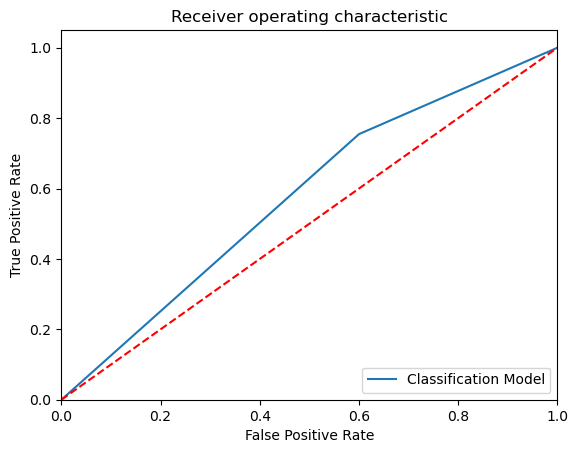

-----------------------------------------------------------------------------------------------------


In [19]:
# To build the 'Decision Tree' model with random sampling

from sklearn.tree import DecisionTreeClassifier 

# Create an object for model

ModelDT = DecisionTreeClassifier()
#ModelDT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
#                                 random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                                 class_weight=None, ccp_alpha=0.0)

# Train the model with train data 

ModelDT.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [20]:
# Load the results dataset

EMResults = pd.read_csv(r"C:\Users\yuvas\OneDrive\Desktop\intern\EMResults.csv", header=0)

# Display the first 5 records

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[193  27]
 [ 50  30]]
Outcome values : 
 193 27 50 30
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.88      0.83       220
           0       0.53      0.38      0.44        80

    accuracy                           0.74       300
   macro avg       0.66      0.63      0.64       300
weighted avg       0.72      0.74      0.73       300

Accuracy : 74.3 %
Precision : 79.4 %
Recall : 87.7 %
F1 Score : 0.834
Specificity or True Negative Rate : 37.5 %
Balanced Accuracy : 62.6 %
MCC : 0.284
roc_auc_score: 0.626


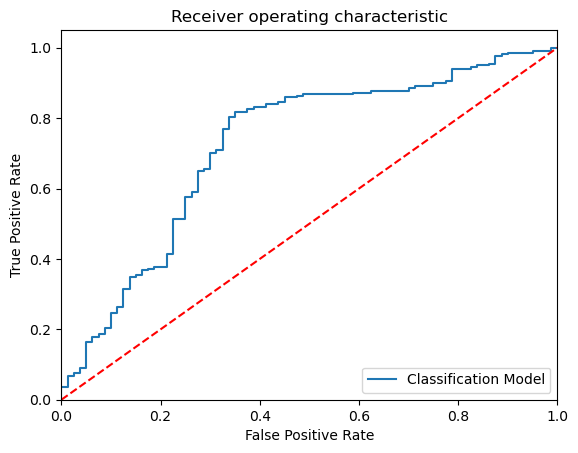

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[163  57]
 [ 48  32]]
Outcome values : 
 163 57 48 32
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.74      0.76       220
           0       0.36      0.40      0.38        80

    accuracy                           0.65       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.66      0.65      0.66       300

Accuracy : 65.0 %
Precision : 77.3 %
Recall : 74.1 %
F1 Score : 0.756
Specificity or True Negative Rate : 40.0 %
Balanced Accuracy : 57.0 %
MCC : 0.136
roc_auc_score: 0.57


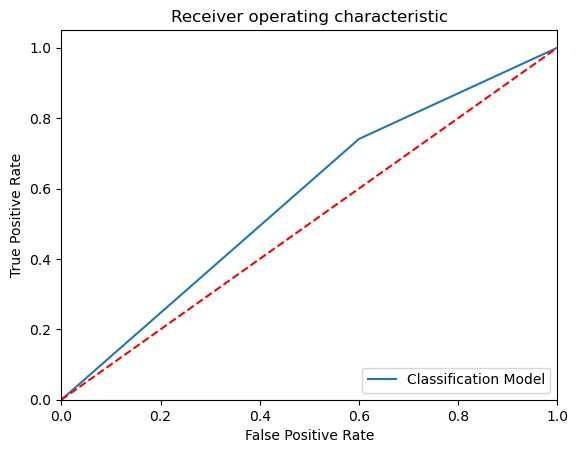

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[198  22]
 [ 50  30]]
Outcome values : 
 198 22 50 30
Classification report : 
               precision    recall  f1-score   support

           1       0.80      0.90      0.85       220
           0       0.58      0.38      0.45        80

    accuracy                           0.76       300
   macro avg       0.69      0.64      0.65       300
weighted avg       0.74      0.76      0.74       300

Accuracy : 76.0 %
Precision : 79.8 %
Recall : 90.0 %
F1 Score : 0.846
Specificity or True Negative Rate : 37.5 %
Balanced Accuracy : 63.8 %
MCC : 0.321
roc_auc_score: 0.638


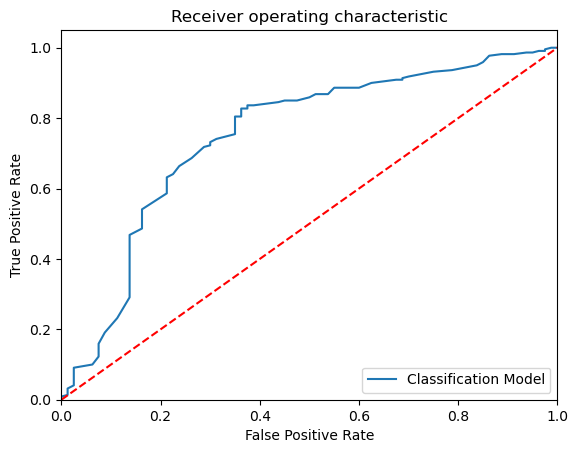

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[200  20]
 [ 61  19]]
Outcome values : 
 200 20 61 19
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.91      0.83       220
           0       0.49      0.24      0.32        80

    accuracy                           0.73       300
   macro avg       0.63      0.57      0.58       300
weighted avg       0.69      0.73      0.69       300

Accuracy : 73.0 %
Precision : 76.6 %
Recall : 90.9 %
F1 Score : 0.832
Specificity or True Negative Rate : 23.8 %
Balanced Accuracy : 57.4 %
MCC : 0.193
roc_auc_score: 0.573


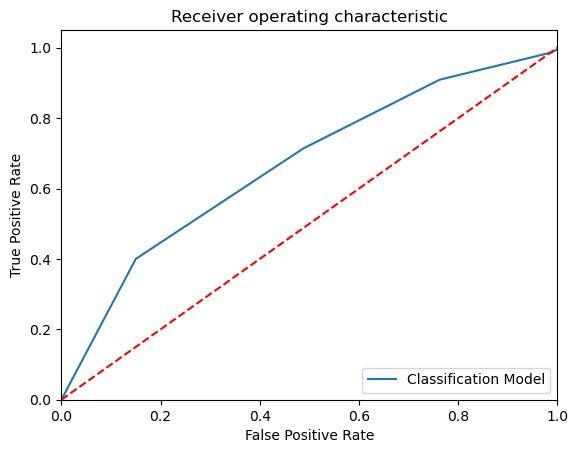

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[173  47]
 [ 36  44]]
Outcome values : 
 173 47 36 44
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.79      0.81       220
           0       0.48      0.55      0.51        80

    accuracy                           0.72       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.74      0.72      0.73       300

Accuracy : 72.3 %
Precision : 82.8 %
Recall : 78.6 %
F1 Score : 0.807
Specificity or True Negative Rate : 55.0 %
Balanced Accuracy : 66.8 %
MCC : 0.324
roc_auc_score: 0.668


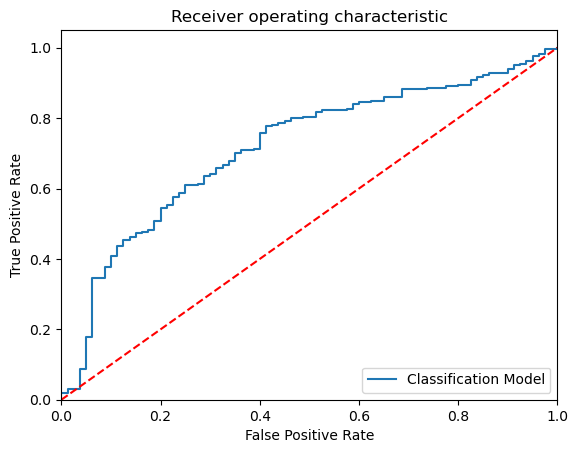

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[210  10]
 [ 70  10]]
Outcome values : 
 210 10 70 10
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.95      0.84       220
           0       0.50      0.12      0.20        80

    accuracy                           0.73       300
   macro avg       0.62      0.54      0.52       300
weighted avg       0.68      0.73      0.67       300

Accuracy : 73.3 %
Precision : 75.0 %
Recall : 95.5 %
F1 Score : 0.84
Specificity or True Negative Rate : 12.5 %
Balanced Accuracy : 54.0 %
MCC : 0.141
roc_auc_score: 0.54


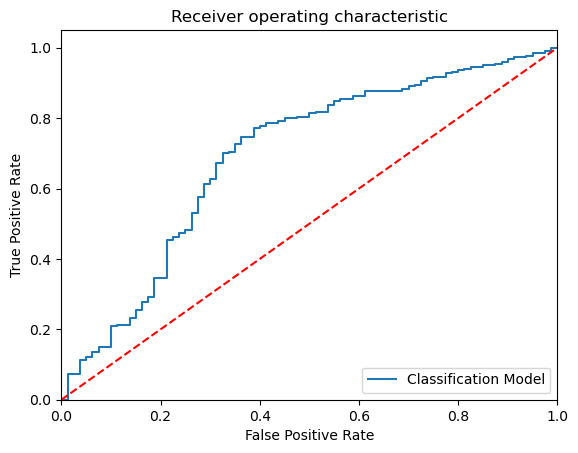

-----------------------------------------------------------------------------------------------------
Model Name:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
Confusion matrix : 
 [[192  28]
 [ 43  37]]
Outcome values : 
 192 28 43 37
Classification report : 
               precision    r

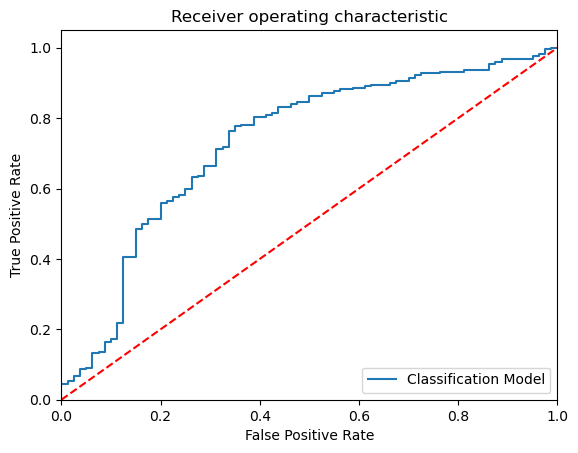

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[195  25]
 [ 41  39]]
Outcome values : 
 195 25 41 39
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.89      0.86       220
           0       0.61      0.49      0.54        80

    accuracy                           0.78       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.77      0.78      0.77       300

Accuracy : 78.0 %
Precision : 82.6 %
Recall : 88.6 %
F1 Score : 0.855
Specificity or True Negative Rate : 48.8 %
Balanced Accuracy : 68.7 %
MCC : 0.404
roc_auc_score: 0.687


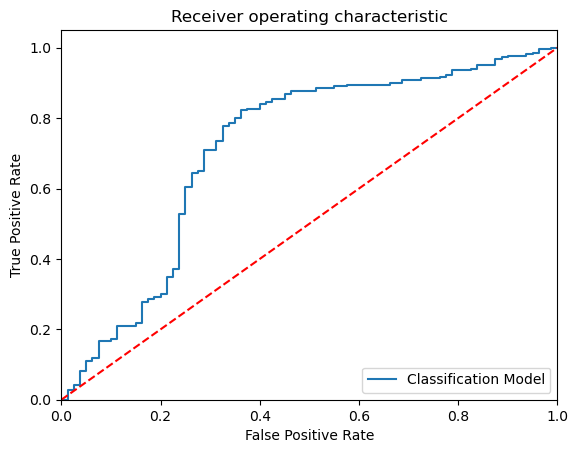

-----------------------------------------------------------------------------------------------------


In [22]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
ModelSVM = SVC(probability=True)
ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelKNN, ModelGNB, ModelSVM, ModelXGB, ModelLGB]
#MM = [ModelLR, ModelDC, ModelRF, ModelGNB, ModelSVM]

for models in MM:
    
    # Fit the modeltrain data
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test data 
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #---

In [23]:
# Results with comparing the all the algorithms 

#EMResults.to_csv("D://R3SPAnalytics//01-SDP//Results//EMResults_01.csv")

EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),193,27,50,30,0.743,0.794,0.877,0.834,0.375,0.284,0.626136,0.626
1,DecisionTreeClassifier(),163,57,48,32,0.650,0.773,0.741,0.756,0.400,0.136,0.570455,0.570
2,"(DecisionTreeClassifier(max_features='sqrt', r...",198,22,50,30,0.760,0.798,0.900,0.846,0.375,0.321,0.637500,0.638
3,KNeighborsClassifier(),200,20,61,19,0.730,0.766,0.909,0.832,0.238,0.193,0.573295,0.574
4,GaussianNB(),173,47,36,44,0.723,0.828,0.786,0.807,0.550,0.324,0.668182,0.668
5,SVC(probability=True),210,10,70,10,0.733,0.750,0.955,0.840,0.125,0.141,0.539773,0.540
6,"XGBClassifier(base_score=None, booster=None, c...",192,28,43,37,0.763,0.817,0.873,0.844,0.462,0.360,0.667614,0.668
7,LGBMClassifier(),195,25,41,39,0.780,0.826,0.886,0.855,0.488,0.404,0.686932,0.687
